# Lấy dữ liệu 

Về chỉ số:

- chỉ số VN30 (30 mã chứng khoán tốt nhất sàn HOSE - Hồ Chí Minh), 
- chỉ số S&P500 (mã 500 công ty vốn hóa tốt nhất của Mỹ), 
- chỉ số lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm

In [1]:
# %pip install yfinance matplotlib seaborn plotly

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import pandas_datareader as web
import datetime

In [3]:
vn30_july2024 = [
    "ACB.VN",
    "BID.VN",
    "BVH.VN",
    "BCM.VN",
    "CTG.VN",
    "FPT.VN",
    "GAS.VN",
    "GVR.VN",
    "HDB.VN",
    "HPG.VN",
    "MBB.VN",
    "MSN.VN",
    "MWG.VN",
    "PLX.VN",
    "VIB.VN",
    "POW.VN",
    "SAB.VN",
    "SSI.VN",
    "STB.VN",
    "TCB.VN",
    "TPB.VN",
    "VCB.VN",
    "VHM.VN",
    "VIC.VN",
    "VJC.VN",
    "VNM.VN",
    "VPB.VN",
    "VRE.VN",
    "SHB.VN",
    "SSB.VN",
]

dictionary = {
    "Ngân hàng": [
        "ACB.VN",
        "BID.VN",
        "BVH.VN",
        "CTG.VN",
        "HDB.VN",
        "MBB.VN",
        "STB.VN",
        "TCB.VN",
        "TPB.VN",
        "VCB.VN",
        "VPB.VN",
        "SHB.VN",
        "SSB.VN",
    ],
    "Bất động sản": ["VIC.VN", "VHM.VN", "VRE.VN"],
    "Năng lượng": ["POW.VN", "GAS.VN"],
    "Hàng tiêu dùng": ["MSN.VN", "VNM.VN"],
    "Dịch vụ tiêu dùng": ["VJC.VN", "MWG.VN"],
    "Công nghệ": ["FPT.VN"],
    "Vật liệu": ["HPG.VN", "PLX.VN"],
    "Đồ uống": ["SAB.VN"],
    "Chứng khoán": ["SSI.VN", "VIB.VN"],
    "Khác": ["BCM.VN", "GVR.VN"],
}

# Lấy dữ liệu lãi suất 10 năm của Mỹ từ FRED
vn30 = yf.download(vn30_july2024, period="max")
sp500 = yf.download(["^GSPC"], period="max")
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()
d10y = web.DataReader(["DGS10"], "fred", start, end)

# Chuẩn hóa lại dữ liệu
vn30.index = pd.to_datetime(vn30.index.tz_convert(None))
sp500.index = pd.to_datetime(sp500.index)
d10y.index = pd.to_datetime(d10y.index)

# Print
print("Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)")
print(vn30["Close"]["MBB.VN"].tail())
print("-" * 45)
print("Tải xuống chỉ số S&P 500")
print(sp500["Close"].tail())
print("-" * 45)
print("Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm")
print(d10y["DGS10"].tail())

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed


Tải xuống chỉ số VN30 (danh sách các mã cập nhật tại tháng 7/2024)
Date
2024-09-10    23750.0
2024-09-11    23900.0
2024-09-12    24000.0
2024-09-13    23900.0
2024-09-16    23900.0
Name: MBB.VN, dtype: float64
---------------------------------------------
Tải xuống chỉ số S&P 500
Date
2024-09-10    5495.520020
2024-09-11    5554.129883
2024-09-12    5595.759766
2024-09-13    5626.020020
2024-09-16    5628.569824
Name: Close, dtype: float64
---------------------------------------------
Tải xuống lãi suất trái phiếu chính phủ Mỹ kỳ hạn 10 năm
DATE
2024-09-06    3.72
2024-09-09    3.70
2024-09-10    3.65
2024-09-11    3.65
2024-09-12    3.68
Name: DGS10, dtype: float64


# Phân tích tổng quan Việt Nam và thế giới

## Phân tích biểu đồ tương quan giữa VN30, S&P 500 và lãi suất trái phiếu 10 năm

Dữ liệu lọc sạch tổng hợp là: 
                VN30_Sum       S&P500  10Y_Treasury_Yield
2024-09-06  1.358901e+06  5408.419922                3.72
2024-09-09  1.349789e+06  5471.049805                3.70
2024-09-10  1.340051e+06  5495.520020                3.65
2024-09-11  1.338661e+06  5554.129883                3.65
2024-09-12  1.341411e+06  5595.759766                3.68
Ma trận tương quan: 
                    VN30_Sum    S&P500  10Y_Treasury_Yield
VN30_Sum            1.000000  0.887844            0.179945
S&P500              0.887844  1.000000           -0.048728
10Y_Treasury_Yield  0.179945 -0.048728            1.000000


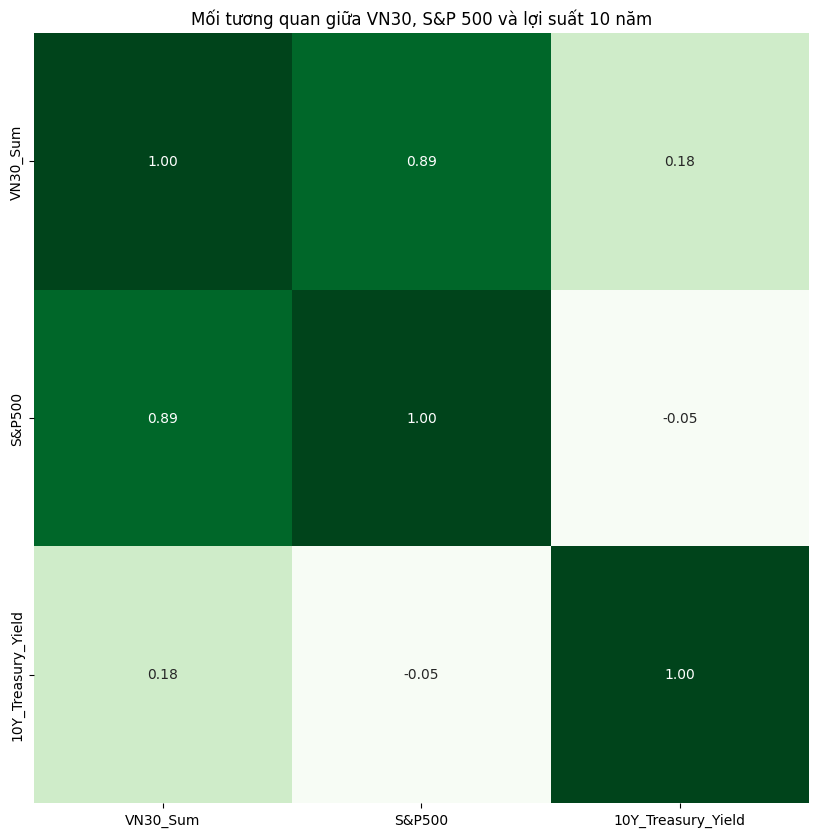

In [4]:
# Tạo dataframe hợp nhất
merged_data = pd.concat(
    [vn30["Close"].sum(axis=1), sp500["Close"], d10y["DGS10"]], axis=1, join="inner"
)

# Đổi tên cột
merged_data.columns = ["VN30_Sum", "S&P500", "10Y_Treasury_Yield"]

# Xem thử dữ liệu
print(f"Dữ liệu lọc sạch tổng hợp là: \n{merged_data.tail()}")

# Tính ma trận tương quan
correlation_matrix = merged_data.corr()
print(f"Ma trận tương quan: \n{correlation_matrix}")

# Vẽ heatmap với colorbar bị ẩn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", cbar=False)
plt.title("Mối tương quan giữa VN30, S&P 500 và lợi suất 10 năm")
plt.show()

**Hiểu về biểu đồ:**

Biểu đồ trên là một ma trận tương quan (correlation matrix), thể hiện mức độ liên quan giữa các cặp biến số: VN30, S&P 500 và lãi suất trái phiếu 10 năm. Các giá trị trong ma trận nằm trong khoảng từ -1 đến 1, trong đó:

* **Giá trị gần 1:** Hai biến số có mối tương quan dương mạnh, nghĩa là khi biến này tăng thì biến kia cũng có xu hướng tăng.
* **Giá trị gần -1:** Hai biến số có mối tương quan âm mạnh, nghĩa là khi biến này tăng thì biến kia có xu hướng giảm.
* **Giá trị gần 0:** Hai biến số gần như không có mối tương quan.

**Phân tích chi tiết:**

* **VN30 và S&P 500:** Mối tương quan giữa VN30 và S&P 500 là 0.89, cho thấy hai chỉ số này có mối liên hệ rất chặt chẽ. Khi thị trường chứng khoán Mỹ (đại diện bởi S&P 500) tăng trưởng, thị trường chứng khoán Việt Nam (đại diện bởi VN30) cũng có xu hướng tăng và ngược lại. Điều này cho thấy thị trường chứng khoán Việt Nam chịu ảnh hưởng lớn từ diễn biến của thị trường chứng khoán Mỹ.
* **VN30 và lãi suất trái phiếu 10 năm:** Mối tương quan giữa VN30 và lãi suất trái phiếu 10 năm là 0.18, cho thấy mối liên hệ giữa hai biến số này là khá yếu. Điều này có nghĩa là sự thay đổi của lãi suất trái phiếu 10 năm không ảnh hưởng đáng kể đến diễn biến của chỉ số VN30.
* **S&P 500 và lãi suất trái phiếu 10 năm:** Mối tương quan giữa S&P 500 và lãi suất trái phiếu 10 năm là -0.05, cho thấy mối liên hệ giữa hai biến số này là rất yếu và có xu hướng âm. Điều này có nghĩa là khi lãi suất trái phiếu 10 năm tăng, thị trường chứng khoán Mỹ có xu hướng giảm nhẹ và ngược lại. Tuy nhiên, mối liên hệ này không rõ ràng và cần được phân tích sâu hơn.

**Kết luận:**

* Thị trường chứng khoán Việt Nam (VN30) có mối liên hệ chặt chẽ với thị trường chứng khoán Mỹ (S&P 500).
* Sự thay đổi của lãi suất trái phiếu 10 năm không ảnh hưởng đáng kể đến diễn biến của chỉ số VN30.
* Mối liên hệ giữa S&P 500 và lãi suất trái phiếu 10 năm là rất yếu và không rõ ràng.

**Gợi ý phân tích thêm:**

* **Phân tích theo thời gian:** Chia dữ liệu thành các khoảng thời gian khác nhau để xem mối tương quan có thay đổi theo thời gian hay không.
* **Phân tích theo sự kiện:** Xem xét mối quan hệ giữa các biến số trong các giai đoạn thị trường khác nhau (ví dụ: giai đoạn tăng trưởng, suy thoái).
* **Phân tích hồi quy:** Sử dụng mô hình hồi quy để đánh giá mức độ ảnh hưởng của các biến độc lập (lãi suất, S&P 500) đến biến phụ thuộc (VN30).

## Phân tích biểu đồ mối quan hệ giữa lãi suất trái phiếu 10 năm, S&P 500 và VN30 theo thời gian

Biểu đồ mối quan hệ giữa lãi suất trái phiếu 10 năm, S&P 500 và VN30 theo thời gian

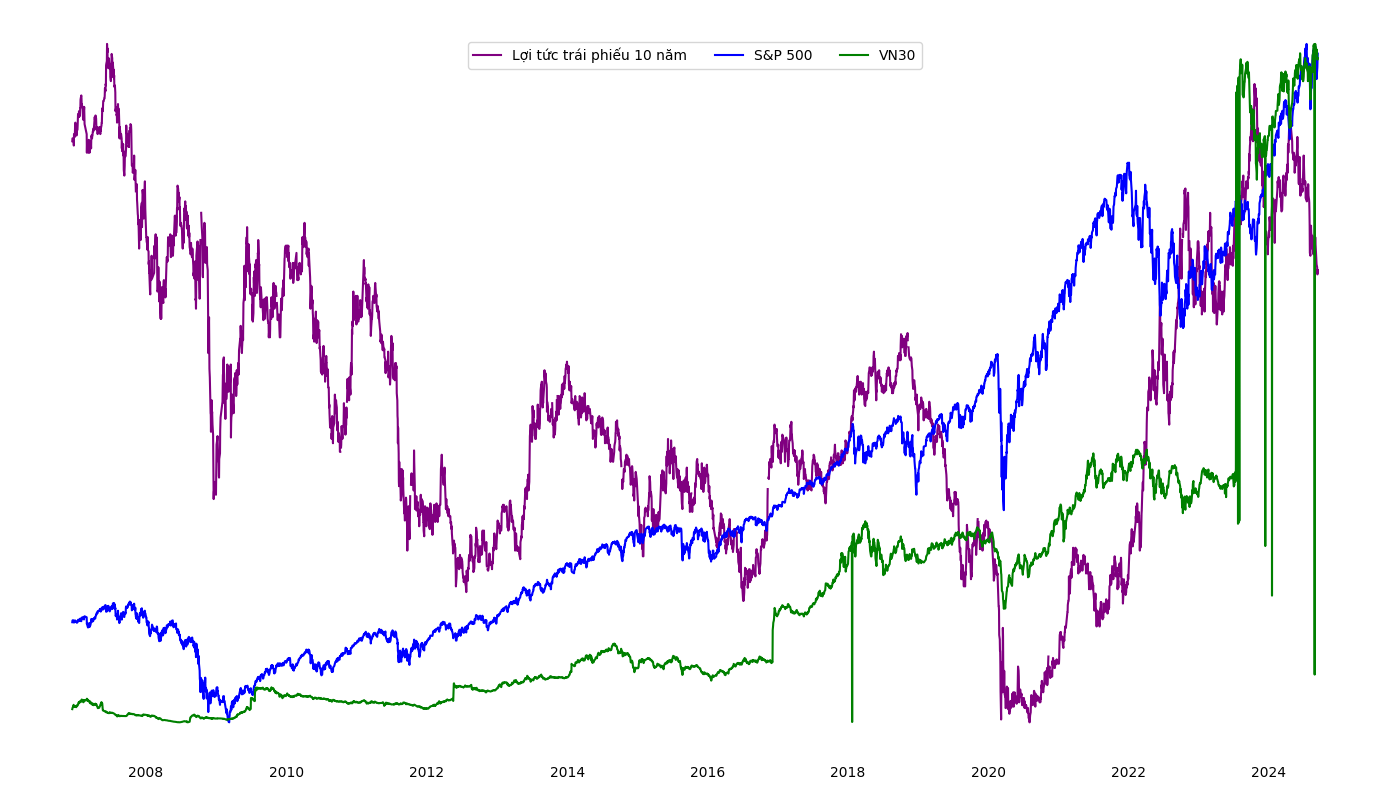

In [5]:
import matplotlib.pyplot as plt

# Tạo một figure và các trục cho ba hệ quy chiếu y khác nhau
fig, ax1 = plt.subplots(figsize=(14, 8))

# Vẽ đường Lợi tức trái phiếu kho bạc 10 năm
ax1.plot(
    merged_data.index,
    merged_data["10Y_Treasury_Yield"],
    color="purple",
    label="Lợi tức trái phiếu 10 năm",
)

# Vẽ đường S&P 500
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data["S&P500"], color="blue", label="S&P 500")

# Vẽ đường VN30 (Tổng cộng 30 cổ phiếu)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))
ax3.plot(merged_data.index, merged_data["VN30_Sum"], color="green", label="VN30")

# Bỏ viền (spines) của tất cả các trục
for ax in [ax1, ax2, ax3]:
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(left=False, right=False, bottom=False)
    ax.set_yticklabels([])

# Ẩn trục x
# ax1.set_xticks([])

# Tạo hộp chú thích ở chính giữa phía trên của biểu đồ
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2, ax3]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc="upper center", bbox_to_anchor=(0.5, 0.95), ncol=3)

# Thêm trục thời gian ở dưới cùng
ax1.set_xlabel("")

# Tối ưu hóa bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### Nhận xét chung

* **Xu hướng dài hạn:**
    * **Lãi suất trái phiếu 10 năm:** Có xu hướng giảm dần trong giai đoạn được quan sát. Điều này thường liên quan đến các chính sách nới lỏng tiền tệ của các ngân hàng trung ương để kích thích kinh tế.
    * **S&P 500 và VN30:** Cả hai chỉ số đều cho thấy xu hướng tăng trưởng chung trong dài hạn, phản ánh sự phát triển của nền kinh tế toàn cầu và Việt Nam.
* **Mối quan hệ giữa các chỉ số:**
    * **Lãi suất trái phiếu và thị trường chứng khoán:** Có vẻ như tồn tại một mối quan hệ nghịch đảo giữa lãi suất trái phiếu và thị trường chứng khoán. Khi lãi suất giảm, nhà đầu tư thường chuyển từ kênh đầu tư trái phiếu sang kênh cổ phiếu, đẩy giá cổ phiếu lên cao. Tuy nhiên, cần phân tích sâu hơn để khẳng định mối quan hệ này.
    * **S&P 500 và VN30:** Hai chỉ số này có xu hướng di chuyển tương đồng, cho thấy sự liên kết chặt chẽ giữa thị trường chứng khoán Việt Nam và thị trường Mỹ. Điều này có thể do nhiều yếu tố như:
        * **Tài chính toàn cầu hóa:** Các nhà đầu tư nước ngoài có ảnh hưởng lớn đến cả hai thị trường.
        * **Chu kỳ kinh tế toàn cầu:** Các sự kiện kinh tế toàn cầu ảnh hưởng đến cả hai nền kinh tế.

### Các câu hỏi cần tìm hiểu thêm

* **Các sự kiện đặc biệt:**
    * Liệu có những sự kiện kinh tế, chính trị hoặc thiên tai nào xảy ra trong giai đoạn này đã ảnh hưởng đến sự biến động của các chỉ số? (ví dụ: khủng hoảng tài chính 2008, đại dịch Covid-19, các cuộc chiến tranh thương mại)
* **Chính sách tiền tệ:**
    * Các chính sách tiền tệ của các ngân hàng trung ương (FED, Ngân hàng Nhà nước Việt Nam) đã có tác động như thế nào đến lãi suất và thị trường chứng khoán?
* **Các ngành công nghiệp:**
    * Sự biến động của các chỉ số có liên quan đến sự phát triển của các ngành công nghiệp chủ chốt trong nền kinh tế không?
* **Tâm lý nhà đầu tư:**
    * Tâm lý nhà đầu tư có vai trò như thế nào trong việc định hình xu hướng của thị trường?

**Ngoài ra có?**:
* So sánh sự biến động của VN30 với S&P 500 trong các giai đoạn khác nhau.
* Phân tích tác động của các chính sách tiền tệ đến lãi suất và thị trường chứng khoán.
* Dự đoán xu hướng của các chỉ số trong tương lai gần.
* 
### Các phân tích sâu hơn có thể thực hiện

* **Phân tích tương quan:** Tính toán hệ số tương quan giữa các cặp biến số để đánh giá mức độ liên hệ.
* **Phân tích hồi quy:** Xây dựng mô hình hồi quy để dự báo giá trị của một biến dựa trên các biến khác.
* **Phân tích chuỗi thời gian:** Sử dụng các kỹ thuật phân tích chuỗi thời gian để phát hiện các mô hình và xu hướng.
* **Phân tích sự kiện:** Phân tích tác động của các sự kiện cụ thể đến thị trường.

**Các công cụ có thể sử dụng sau này:**
* **Python:** Pandas, NumPy, Matplotlib, Seaborn, Statsmodels
* **R:** Các gói như tidyverse, forecast, quantmod
* **Các phần mềm chuyên dụng:** EViews, Stata

**Các khái niệm cần tìm hiểu thêm:**
* Chuỗi thời gian (Time series)
* Tương quan (Correlation)
* Hồi quy (Regression)
* Phân tích kỹ thuật (Technical analysis)
* Phân tích cơ bản (Fundamental analysis)

# Phân tích Việt Nam và VN30

## Phân tích mức độ tương quan của 30 mã trong thị trường chứng khoán Việt Nam

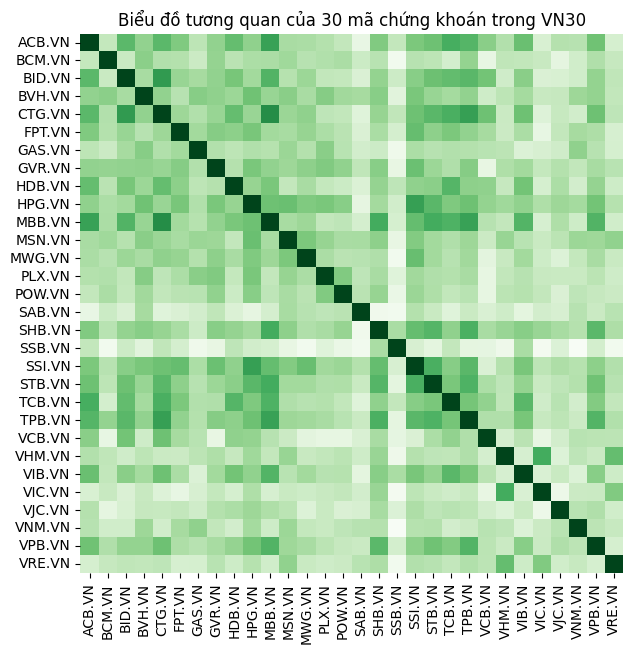

In [12]:
correlation_matrix = vn30["Close"].pct_change(fill_method=None).corr()

plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=False, cmap='Greens', cbar=False)
plt.title('Biểu đồ tương quan của 30 mã chứng khoán trong VN30')
plt.xlabel("")
plt.ylabel("")
plt.show()

### Hiểu về biểu đồ tương quan
Biểu đồ tương quan cho thấy mức độ liên hệ giữa các cặp mã cổ phiếu. Màu sắc càng đậm, tương quan càng cao, nghĩa là khi giá của một mã tăng, giá của mã kia cũng có xu hướng tăng theo. Ngược lại, màu sắc càng nhạt, tương quan càng thấp hoặc âm, tức là hai mã có xu hướng đi ngược chiều nhau.

### Phân tích dựa trên ngành nghề
Với thông tin phân loại ngành nghề được cung cấp, chúng ta có thể rút ra một số nhận xét sau:

1. **Ngành ngân hàng:**
* **Tương quan cao:** Các mã ngân hàng thường có tương quan cao với nhau. Điều này cho thấy các ngân hàng thường chịu ảnh hưởng chung bởi các yếu tố vĩ mô như lãi suất, chính sách tiền tệ, và các sự kiện ngành.
* **Tương quan với các ngành khác:** Ngân hàng có thể có tương quan với bất động sản (do cho vay), với chứng khoán (do cung cấp dịch vụ môi giới) và với các ngành khác tùy thuộc vào cấu trúc nền kinh tế.

2. **Ngành bất động sản:**
* **Tương quan cao nội ngành:** Các mã bất động sản cũng thường có tương quan cao do cùng chịu ảnh hưởng của chính sách nhà ở, lãi suất, và chu kỳ bất động sản.
* **Tương quan với ngân hàng:** Như đã đề cập, ngân hàng và bất động sản có mối liên hệ chặt chẽ.

3. **Các ngành khác:**
* **Tương quan đa dạng:** Các ngành khác như năng lượng, hàng tiêu dùng, công nghệ, v.v. có thể có mối tương quan khác nhau tùy thuộc vào đặc thù của từng ngành và các yếu tố ảnh hưởng đến ngành đó.
* **Tương quan với chỉ số chung:** Các mã trong cùng một ngành thường có xu hướng di chuyển theo chỉ số chung của ngành đó.

### Nhận xét chung và gợi ý
* **Phân tích sâu hơn:** Để có một phân tích chi tiết hơn, cần kết hợp biểu đồ tương quan với các thông tin khác như:
  * **Phân tích kỹ thuật:** Đánh giá xu hướng, điểm hỗ trợ, kháng cự của từng mã.
  * **Phân tích cơ bản:** Đánh giá tình hình kinh doanh, tài chính của từng công ty.
  * **Tin tức thị trường:** Theo dõi các tin tức, sự kiện ảnh hưởng đến thị trường.
* **Xây dựng danh mục đầu tư:** Biểu đồ tương quan có thể giúp nhà đầu tư xây dựng danh mục đầu tư đa dạng hóa rủi ro bằng cách chọn các mã có tương quan thấp.
* **Phân tích yếu tố:** Có thể sử dụng phân tích yếu tố để xác định các yếu tố chung ảnh hưởng đến nhiều mã cổ phiếu.
* **So sánh với các thị trường khác:** So sánh tương quan của các mã Việt Nam với các mã tương ứng trên thị trường quốc tế.

### Cải tiến biểu đồ
Để biểu đồ trực quan hơn, có thể:
* **Thay đổi thang màu:** Chọn thang màu phù hợp để dễ dàng phân biệt các mức độ tương quan.
* **Thêm chú thích:** Thêm chú thích cho các nhóm ngành để dễ dàng nhận biết.
* **Sắp xếp lại các mã:** Sắp xếp các mã theo ngành hoặc theo mức độ tương quan để dễ so sánh.

**Lưu ý:**
* Biểu đồ tương quan chỉ cho thấy mối liên hệ thống kê giữa các mã cổ phiếu, không phải là mối quan hệ nhân quả.
* Việc đầu tư chứng khoán luôn tiềm ẩn rủi ro. Quyết định đầu tư nên dựa trên nhiều yếu tố khác nhau, không chỉ dựa trên biểu đồ tương quan.


## Phân tích về mức thanh khoản của chung thị trường và từng nhóm ngành

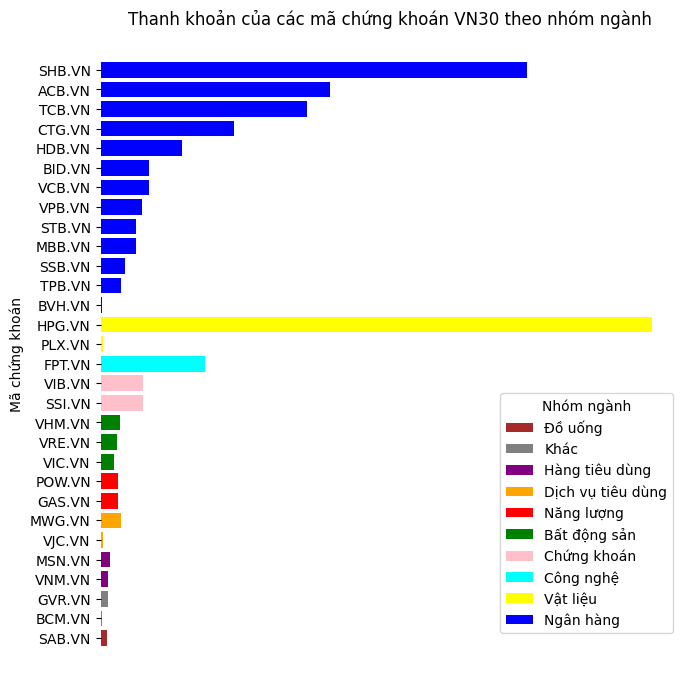

In [6]:
total_volume = vn30["Volume"].sum()

# Tạo danh sách dữ liệu với tổng thanh khoản cho mỗi mã cổ phiếu theo nhóm ngành
data = []
for sector, stocks in dictionary.items():
    sector_volume = 0
    for stock in stocks:
        if stock in total_volume.index:
            stock_volume = total_volume[stock]
            sector_volume += stock_volume
            data.append(
                {"Sector": sector, "Stock": stock, "Total Volume": stock_volume}
            )
    # Thêm tổng thanh khoản cho từng nhóm ngành để sắp xếp ngành
    data.append(
        {
            "Sector": sector,
            "Stock": "Total",  # Đánh dấu tổng của nhóm ngành
            "Total Volume": sector_volume,
        }
    )

# Chuyển đổi sang DataFrame
df_volume = pd.DataFrame(data)

# Loại bỏ hàng chứa 'Total' để giữ chỉ các cổ phiếu
df_volume_stocks = df_volume[df_volume["Stock"] != "Total"]

# Sắp xếp các mã cổ phiếu trong mỗi nhóm ngành theo tổng thanh khoản tăng dần
df_volume_stocks = df_volume_stocks.sort_values(
    by=["Sector", "Total Volume"], ascending=[True, True]
)

# Tính tổng thanh khoản cho từng nhóm ngành và sắp xếp nhóm ngành theo thứ tự tăng dần
df_total_sector = df_volume[df_volume["Stock"] == "Total"].sort_values(
    by="Total Volume", ascending=True
)

# Vẽ biểu đồ ngang
plt.figure(figsize=(7, 7))

# Đặt màu cho mỗi nhóm ngành
colors = {
    "Ngân hàng": "blue",
    "Bất động sản": "green",
    "Năng lượng": "red",
    "Hàng tiêu dùng": "purple",
    "Dịch vụ tiêu dùng": "orange",
    "Công nghệ": "cyan",
    "Vật liệu": "yellow",
    "Đồ uống": "brown",
    "Chứng khoán": "pink",
    "Khác": "gray",
}

# Duyệt qua các nhóm ngành đã sắp xếp và vẽ biểu đồ
position = 0
y_labels = []  # Danh sách để lưu trữ thứ tự mã cổ phiếu
for _, row in df_total_sector.iterrows():
    sector = row["Sector"]
    sector_data = df_volume_stocks[df_volume_stocks["Sector"] == sector]

    # Vẽ các mã cổ phiếu trong nhóm ngành theo chiều ngang
    plt.barh(
        [position + i for i in range(len(sector_data))],
        sector_data["Total Volume"],
        label=sector,
        color=colors[sector],
    )

    # Thêm mã cổ phiếu vào danh sách y_labels
    y_labels.extend(sector_data["Stock"].tolist())

    # Cập nhật vị trí cho nhóm ngành tiếp theo
    position += len(sector_data)

# Thêm thông tin biểu đồ
plt.title("Thanh khoản của các mã chứng khoán VN30 theo nhóm ngành")
plt.ylabel("Mã chứng khoán")

# Thiết lập nhãn mã cổ phiếu theo đúng thứ tự xuất hiện
plt.yticks([i for i in range(len(y_labels))], y_labels)

# Di chuyển hộp chú thích lên góc phải trên cùng
plt.legend(title="Nhóm ngành", bbox_to_anchor=(1, 0.45), loc="upper right")

# Ẩn trục hoành
plt.gca().axes.get_xaxis().set_visible(False)

# Loại bỏ viền ngoài
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Dựa trên biểu đồ thanh khoản của các mã cổ phiếu VN30 theo nhóm ngành, chúng ta có thể rút ra một số nhận xét sau:**

### Nhóm ngành có thanh khoản cao nhất
* **Ngành ngân hàng:** Các mã ngân hàng như ACB, TCB, VCB, BID... thường có thanh khoản cao nhất. Điều này cho thấy nhà đầu tư rất quan tâm đến nhóm ngành này. Có thể do ngân hàng là một ngành trụ cột của nền kinh tế, và các ngân hàng lớn thường có quy mô vốn hóa lớn, thu hút nhiều nhà đầu tư.
* **Ngành vật liệu:** Các mã trong ngành vật liệu như HPG cũng có mức thanh khoản khá cao. Điều này có thể do ngành vật liệu đóng vai trò quan trọng trong quá trình công nghiệp hóa và hiện đại hóa đất nước, và các doanh nghiệp trong ngành thường có kết quả kinh doanh ổn định.

### Nhóm ngành có thanh khoản thấp nhất
* **Các ngành khác:** Nhóm "Khác" thường có thanh khoản thấp nhất, cho thấy nhà đầu tư ít quan tâm đến các mã cổ phiếu này hơn. 
* **Một số ngành đặc thù:** Một số ngành như chứng khoán, đồ uống, công nghệ... cũng có thanh khoản thấp hơn so với các ngành truyền thống như ngân hàng, bất động sản. Điều này có thể do đặc thù của từng ngành, quy mô vốn hóa của các công ty, hoặc do các yếu tố khác.

### Nguyên nhân dẫn đến sự khác biệt về thanh khoản
* **Quy mô vốn hóa:** Các công ty có vốn hóa lớn thường có thanh khoản cao hơn do số lượng cổ phiếu lưu hành nhiều và thu hút được nhiều nhà đầu tư.
* **Tính thanh khoản của thị trường:** Khi thị trường chung sôi động, thanh khoản của hầu hết các mã cổ phiếu đều tăng. Ngược lại, khi thị trường trầm lắng, thanh khoản sẽ giảm.
* **Thông tin công bố:** Các tin tức, sự kiện liên quan đến doanh nghiệp hoặc ngành có thể tác động mạnh đến thanh khoản của cổ phiếu.
* **Chính sách của nhà nước:** Các chính sách về tiền tệ, tín dụng, đầu tư công... cũng ảnh hưởng đến thanh khoản của thị trường.
* **Tâm lý nhà đầu tư:** Sự kỳ vọng của nhà đầu tư vào triển vọng của từng ngành cũng ảnh hưởng đến quyết định mua bán và do đó ảnh hưởng đến thanh khoản.

### Ý nghĩa đối với nhà đầu tư
* **Đa dạng hóa danh mục:** Nhà đầu tư nên cân nhắc đầu tư vào các mã cổ phiếu có thanh khoản cao để dễ dàng mua bán.
* **Giảm thiểu rủi ro:** Các mã cổ phiếu có thanh khoản cao thường ít biến động hơn so với các mã có thanh khoản thấp, giúp giảm thiểu rủi ro cho danh mục đầu tư.
* **Nắm bắt cơ hội:** Khi thị trường có biến động mạnh, các mã có thanh khoản cao thường có cơ hội tăng trưởng tốt hơn.

**Tổng kết:**
Biểu đồ thanh khoản cung cấp một cái nhìn tổng quan về sự quan tâm của nhà đầu tư đối với từng nhóm ngành. Tuy nhiên, để đưa ra quyết định đầu tư, nhà đầu tư cần phải phân tích kỹ lưỡng hơn, bao gồm cả các yếu tố cơ bản của doanh nghiệp, tình hình kinh tế vĩ mô và các yếu tố kỹ thuật.

**Để có một phân tích chi tiết hơn, chúng ta có thể:**
* So sánh biểu đồ này với các biểu đồ tương tự trong quá khứ để xem xu hướng thay đổi của thanh khoản theo thời gian.
* Phân tích mối quan hệ giữa thanh khoản và các yếu tố khác như lợi nhuận, tăng trưởng doanh thu, và tỷ lệ cổ tức.
* So sánh thanh khoản của các mã cổ phiếu Việt Nam với các mã cổ phiếu trên thị trường quốc tế.

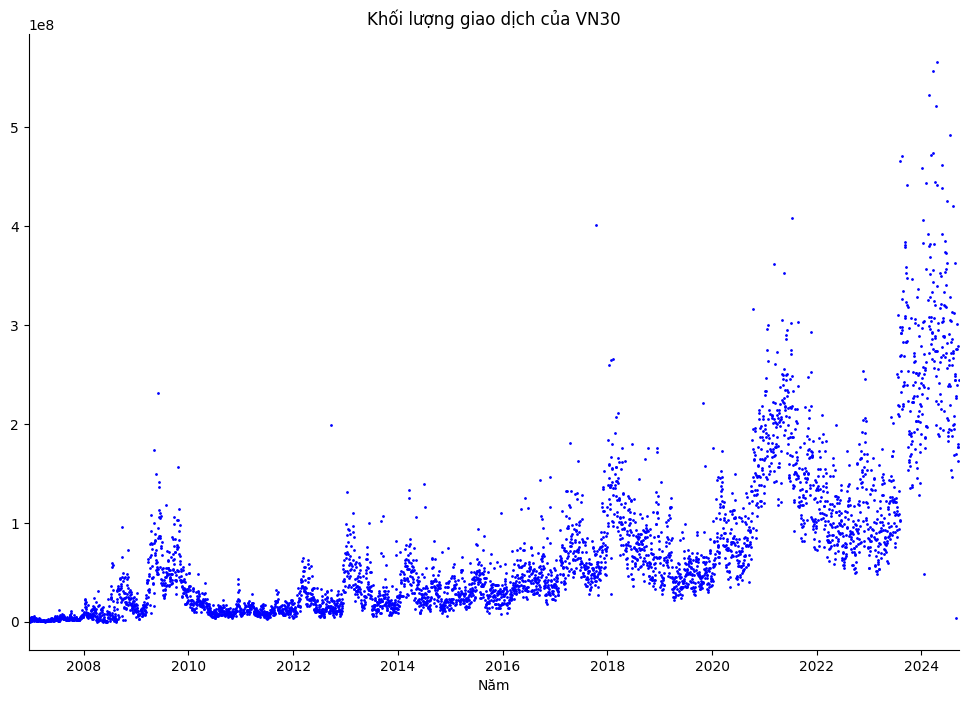

In [7]:
total_volume = vn30["Volume"].sum(axis=1)
plt.figure(figsize=(12, 8))
plt.scatter(total_volume.index, total_volume, color="blue", s=1, marker="o")
plt.title("Khối lượng giao dịch của VN30")
plt.xlabel("Năm")
plt.grid(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(True)
plt.xlim(total_volume.index.min(), total_volume.index.max())
plt.xticks(rotation=0)
plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.show()

**Phân tích biểu đồ khối lượng giao dịch của VN30**

**Quan sát chung:**

Biểu đồ thể hiện rõ ràng sự biến động của khối lượng giao dịch của các mã cổ phiếu thuộc chỉ số VN30 trong khoảng thời gian từ năm 2008 đến năm 2024. Có thể rút ra một số nhận xét chính sau:

* **Xu hướng tăng trưởng:** Nhìn chung, khối lượng giao dịch của VN30 có xu hướng tăng dần qua các năm, đặc biệt là trong những năm gần đây. Điều này cho thấy sự quan tâm của nhà đầu tư đối với thị trường chứng khoán Việt Nam ngày càng tăng.
* **Biến động mạnh:** Khối lượng giao dịch có những biến động rất lớn trong từng thời kỳ, có những giai đoạn tăng trưởng mạnh và cũng có những giai đoạn giảm sút. Điều này cho thấy thị trường chứng khoán Việt Nam chịu ảnh hưởng lớn bởi các yếu tố nội tại và ngoại tại.
* **Các giai đoạn đỉnh điểm:** Có thể thấy một số giai đoạn khối lượng giao dịch đạt đỉnh cao, thường đi kèm với những biến động mạnh của thị trường. Các đỉnh này có thể xuất hiện sau những sự kiện quan trọng như:
    * Các chính sách hỗ trợ thị trường của nhà nước
    * Các thông tin tích cực về nền kinh tế
    * Sự kiện thế giới có ảnh hưởng đến thị trường chứng khoán toàn cầu

**Phân tích sâu hơn:**

Để có một phân tích chi tiết hơn, cần phải kết hợp biểu đồ khối lượng giao dịch với các chỉ số khác như:
* **Giá cổ phiếu:** So sánh sự biến động của giá cổ phiếu với khối lượng giao dịch để đánh giá tâm lý nhà đầu tư.
* **Các chỉ số kỹ thuật:** Sử dụng các chỉ số kỹ thuật như RSI, MACD để xác định xu hướng và điểm mua bán.
* **Các tin tức, sự kiện:** Phân tích tác động của các tin tức, sự kiện đến khối lượng giao dịch.

**Các yếu tố ảnh hưởng đến khối lượng giao dịch:**

* **Tâm lý nhà đầu tư:** Khi nhà đầu tư lạc quan về thị trường, khối lượng giao dịch thường tăng lên. Ngược lại, khi nhà đầu tư lo ngại, khối lượng giao dịch có thể giảm.
* **Chính sách tiền tệ:** Các chính sách tiền tệ của ngân hàng trung ương có thể ảnh hưởng đến lãi suất, từ đó tác động đến dòng tiền vào thị trường chứng khoán.
* **Chính sách kinh tế vĩ mô:** Các chính sách kinh tế của chính phủ, các sự kiện chính trị cũng có thể ảnh hưởng đến niềm tin của nhà đầu tư và khối lượng giao dịch.
* **Thông tin doanh nghiệp:** Các thông tin về kết quả kinh doanh, kế hoạch kinh doanh của các công ty niêm yết cũng tác động đến quyết định mua bán của nhà đầu tư.

**Ý nghĩa đối với nhà đầu tư:**

* **Đánh giá sức khỏe của thị trường:** Khối lượng giao dịch là một trong những chỉ số quan trọng để đánh giá sức khỏe của thị trường. Khi khối lượng giao dịch tăng, cho thấy thị trường đang sôi động và thu hút được nhiều sự quan tâm của nhà đầu tư.
* **Xác định điểm mua bán:** Khối lượng giao dịch có thể giúp nhà đầu tư xác định các điểm mua bán tiềm năng.
* **Đa dạng hóa danh mục đầu tư:** Nhà đầu tư nên phân bổ danh mục đầu tư vào các mã cổ phiếu có thanh khoản cao để dễ dàng mua bán.

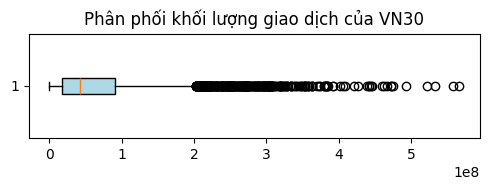

In [8]:
plt.figure(figsize=(5, 2))
plt.boxplot(total_volume.values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.grid(False)
plt.title('Phân phối khối lượng giao dịch của VN30')
plt.tight_layout()
plt.show()

**Biểu đồ boxplot** cho thấy khối lượng giao dịch của các mã cổ phiếu trong VN30 có sự phân bố không đồng đều. Điều này có nghĩa là:

* **Hầu hết các ngày giao dịch có khối lượng ở mức thấp:** Phần lớn các ngày, khối lượng giao dịch khá ổn định và không có nhiều biến động lớn.
* **Một số ngày có khối lượng giao dịch rất lớn:** Có một số ngày rất ít, khối lượng giao dịch đột ngột tăng vọt. Điều này có thể do các sự kiện đặc biệt như tin tức công ty, chính sách mới, hoặc tâm lý nhà đầu tư thay đổi đột ngột.
* **Phân bố lệch phải:** Đa số các điểm dữ liệu tập trung ở phía bên trái của biểu đồ, trong khi có một số điểm dữ liệu rất lớn nằm ở phía bên phải. Điều này cho thấy khối lượng giao dịch có xu hướng lệch về phía cao hơn.

**Ý nghĩa:**

* **Tính biến động của thị trường:** Sự phân bố không đồng đều này cho thấy thị trường VN30 có tính biến động khá cao.
* **Cơ hội và rủi ro:** Những ngày có khối lượng giao dịch lớn thường mang lại cơ hội sinh lời cao cho nhà đầu tư, nhưng cũng tiềm ẩn rủi ro lớn nếu nhà đầu tư không có đủ thông tin và kinh nghiệm.

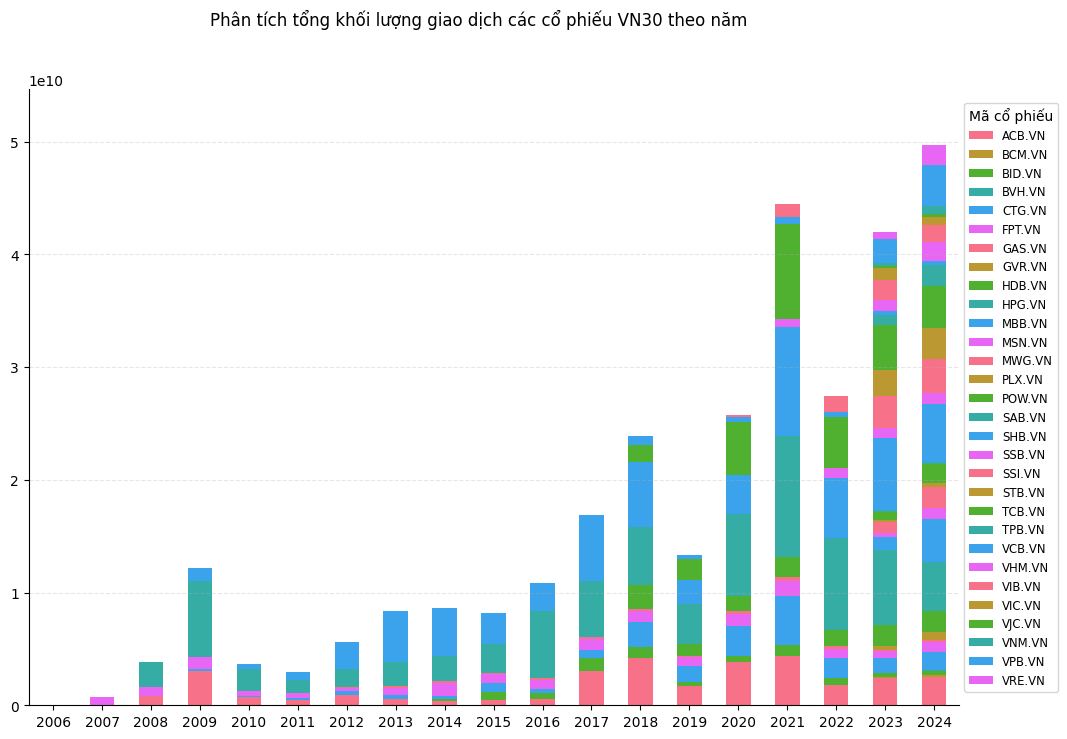

In [9]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng
pivot_df = volume_df.groupby("Year").sum()

# Vẽ biểu đồ khối lượng của các cổ phiếu theo năm
sns.set_palette("husl")
pivot_df.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.xlabel("")  
plt.grid(False)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylim(0, pivot_df.sum(axis=1).max() * 1.1)
plt.xticks(rotation=0)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(title="Mã cổ phiếu", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.suptitle("Phân tích tổng khối lượng giao dịch các cổ phiếu VN30 theo năm")
plt.show()

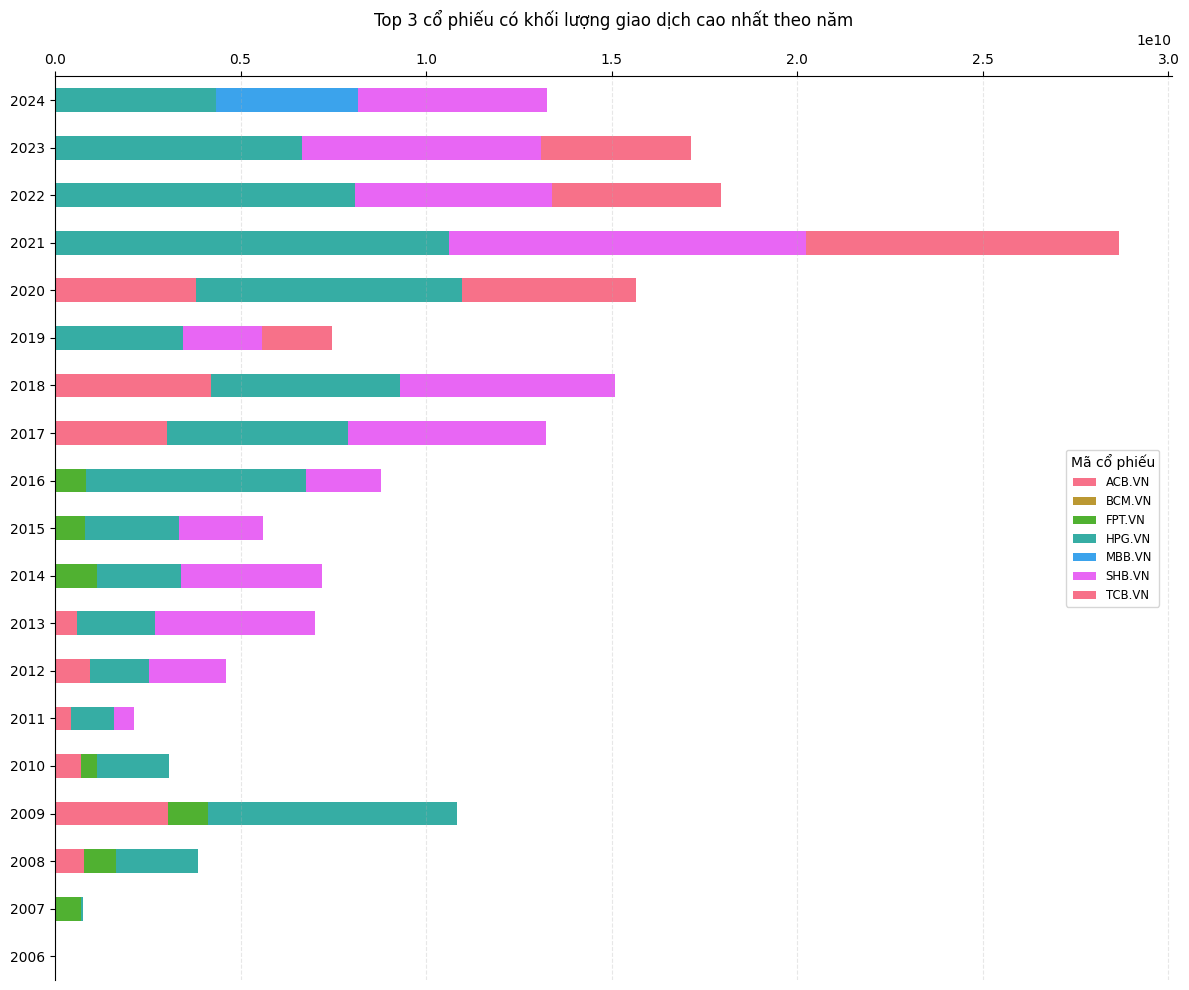

In [10]:
df = vn30

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến Volume
volume_columns = [col for col in df.columns if col[0] == "Volume"]

# Tạo dataframe chỉ chứa các cột Volume
volume_df = df[volume_columns].copy()
volume_df.columns = volume_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn

# Thêm cột 'Year' vào dataframe
volume_df["Year"] = volume_df.index.year

# Nhóm dữ liệu theo năm và tính tổng khối lượng cho từng mã chứng khoán
annual_volume_df = volume_df.groupby(["Year"]).sum()


# Hàm để lấy top 3 cổ phiếu theo khối lượng giao dịch cho từng năm
def get_top_3_stocks(year_df):
    # Sắp xếp các cổ phiếu theo khối lượng giao dịch giảm dần
    sorted_df = year_df.sort_values(ascending=False)
    # Lấy 3 cổ phiếu có khối lượng giao dịch cao nhất
    return sorted_df.head(3)


# Tạo một dataframe cho top 3 cổ phiếu theo năm
top_3_df = annual_volume_df.apply(lambda x: get_top_3_stocks(x), axis=1)

# Chuyển đổi top_3_df thành dạng dataframe với các cột rõ ràng
top_3_df = top_3_df.reset_index()
top_3_df = top_3_df.melt(id_vars="Year", var_name="Ticker", value_name="Volume")

# Đặt lại tên các cột cho dữ liệu
top_3_df.columns = ["Year", "Ticker", "Volume"]

# Sắp xếp dữ liệu theo năm và khối lượng giảm dần
top_3_df = top_3_df.sort_values(by=["Year", "Volume"], ascending=[True, False])

# Pivot dữ liệu để vẽ biểu đồ
pivot_df = top_3_df.pivot_table(
    index="Year", columns="Ticker", values="Volume", aggfunc="sum", fill_value=0
)

# Vẽ biểu đồ cột chồng nằm ngang
fig, ax = plt.subplots(figsize=(12, 10))
pivot_df.plot(kind="barh", stacked=True, ax=ax)

# Di chuyển trục x từ dưới lên trên
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

plt.title("Top 3 cổ phiếu có khối lượng giao dịch cao nhất theo năm")
plt.xlabel("")
plt.ylabel("")
plt.grid(False)
plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(
    title="Mã cổ phiếu", loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize="small"
)

plt.tight_layout()
plt.show()

# Phân tích lựa chọn 1 mã chứng khoán phù hợp

## Phân tích biến động giá cổ phiếu VN30 từ lúc niêm yết đến nay

/tmp/ipykernel_206002/3233965742.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("viridis", num_colors)


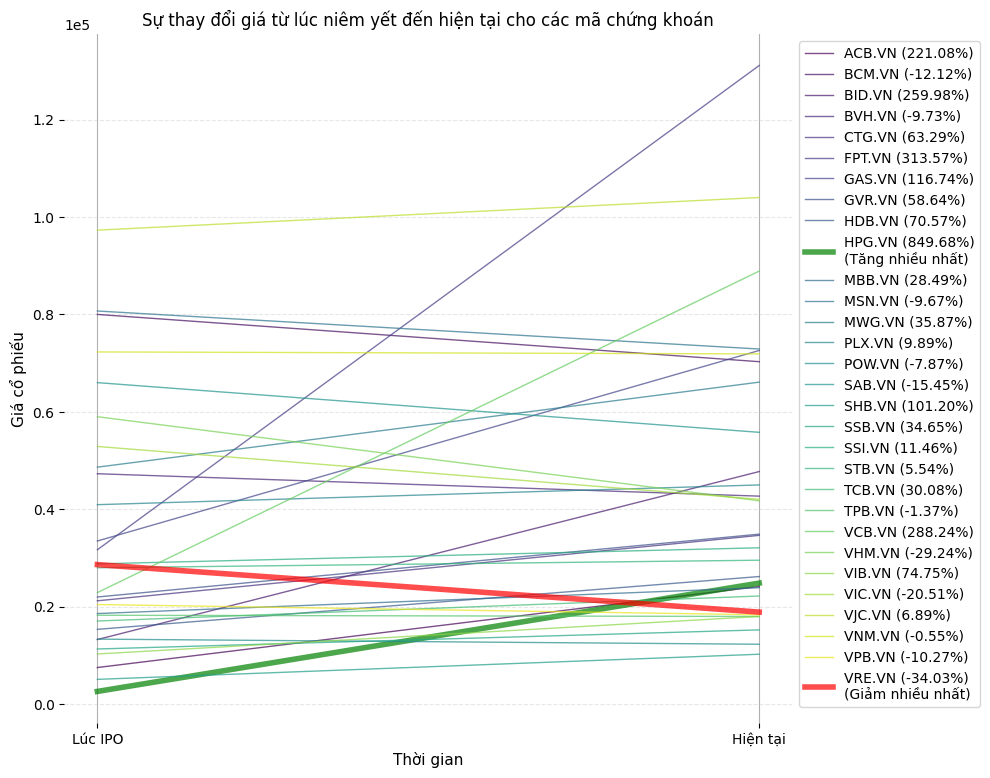

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Đảm bảo cột 'Date' đang ở định dạng datetime
df.index = pd.to_datetime(df.index)

# Lấy các cột liên quan đến giá (Giả sử có cột 'Close')
price_columns = [col for col in df.columns if col[0] == "Close"]

# Tạo dataframe chỉ chứa các cột Giá
price_df = df[price_columns].copy()
price_df.columns = price_df.columns.get_level_values(
    "Ticker"
)  # Chuyển đổi MultiIndex cột thành một chỉ mục đơn


# Chọn giá trị đầu tiên không phải None cho mỗi cổ phiếu
def get_first_valid_price(series):
    return series.dropna().iloc[0]


# Tính giá IPO và giá hiện tại cho từng cổ phiếu
ipo_prices = price_df.apply(lambda x: get_first_valid_price(x), axis=0)
current_prices = price_df.iloc[-1]

# Tính sự thay đổi giá
price_change = current_prices - ipo_prices
price_change_percent = (price_change / ipo_prices) * 100

# Nổi bật các cổ phiếu có tăng trưởng % nhiều nhất và giảm % nhiều nhất
top_increase = price_change_percent.idxmax()
top_decrease = price_change_percent.idxmin()

# Tạo bảng màu tùy chỉnh (ví dụ: viridis)
num_colors = len(price_df.columns)
cmap = plt.cm.get_cmap("viridis", num_colors)
colors = cmap(np.linspace(0, 1, num_colors))

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
for i, ticker in enumerate(price_df.columns):
    if ticker == top_increase:
        color = "green"
        linewidth = 4
        label = f"{ticker} ({price_change_percent[ticker]:.2f}%)\n(Tăng nhiều nhất)"
    elif ticker == top_decrease:
        color = "red"
        linewidth = 4
        label = f"{ticker} ({price_change_percent[ticker]:.2f}%)\n(Giảm nhiều nhất)"
    else:
        color = colors[i]
        linewidth = 1
        label = f"{ticker} ({price_change_percent[ticker]:.2f}%)"
    plt.plot(
        [0, 1],
        [ipo_prices[ticker], current_prices[ticker]],
        color=color,
        alpha=0.7,
        linewidth=linewidth,
        label=label,
    )

plt.title("Sự thay đổi giá từ lúc niêm yết đến hiện tại cho các mã chứng khoán")
plt.xlabel("Thời gian", fontsize=11, fontweight="normal")
plt.ylabel("Giá cổ phiếu", fontsize=11, fontweight="normal")
plt.xticks([0, 1], ["Lúc IPO", "Hiện tại"])
plt.grid(True)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.grid(axis="y", linestyle="--", alpha=0.3)
# Tùy chỉnh legend
plt.legend(loc="upper left", bbox_to_anchor=(1., 1), fontsize=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.show()


**Biểu đồ cho thấy:**

* **Sự đa dạng trong biến động giá:** Các mã cổ phiếu trong VN30 có sự tăng trưởng và giảm khác nhau rất lớn.
* **Có những mã tăng trưởng vượt bậc:** Một số mã như HPG có mức tăng trưởng rất ấn tượng, cho thấy sự phát triển mạnh mẽ của doanh nghiệp và ngành.
* **Có những mã giảm giá:** Một số mã khác lại giảm giá so với thời điểm niêm yết, cho thấy những khó khăn trong kinh doanh hoặc các yếu tố khác tác động.
* **Không có xu hướng chung rõ rệt:** Các mã cổ phiếu không có một xu hướng chung rõ ràng, mà thay đổi tùy thuộc vào từng doanh nghiệp và ngành.

**Nguyên nhân gây ra sự khác biệt:**

* **Đặc điểm ngành:** Các ngành khác nhau có tốc độ tăng trưởng và mức độ ổn định khác nhau. Ví dụ, ngành bất động sản thường có chu kỳ tăng trưởng và suy giảm rõ rệt.
* **Khả năng cạnh tranh của doanh nghiệp:** Các doanh nghiệp có năng lực cạnh tranh cao, quản lý hiệu quả thường có kết quả kinh doanh tốt và giá cổ phiếu tăng trưởng.
* **Chính sách của nhà nước:** Các chính sách về tiền tệ, tài chính, đầu tư công... có thể ảnh hưởng đến toàn bộ thị trường hoặc các ngành cụ thể.
* **Sự kiện bất ngờ:** Các sự kiện như dịch bệnh, thiên tai, biến động chính trị... có thể gây ra những biến động bất ngờ trên thị trường.
* **Tâm lý nhà đầu tư:** Tâm lý lạc quan hoặc bi quan của nhà đầu tư cũng ảnh hưởng lớn đến giá cổ phiếu.

**Ý nghĩa đối với nhà đầu tư:**

* **Đa dạng hóa danh mục:** Nên đầu tư vào nhiều mã cổ phiếu khác nhau để giảm thiểu rủi ro.
* **Phân tích kỹ lưỡng:** Trước khi đầu tư, cần phải phân tích kỹ lưỡng về tình hình kinh doanh của doanh nghiệp, ngành và các yếu tố vĩ mô.
* **Lựa chọn thời điểm:** Nên mua vào khi thị trường đang ở đáy và bán ra khi thị trường đạt đỉnh.


## Phân tích cổ phiếu MB do đây là cổ phiếu em đang yên tâm để nắm giữ

In [30]:
# Chuyển đổi thành DataFrame cho mã cụ thể (ví dụ MBB.VN)
MBB_data = vn30.loc[:, pd.IndexSlice[:, "MBB.VN"]]
MBB_data.columns = MBB_data.columns.droplevel(1)  # Loại bỏ MultiIndex để đơn giản hóa
MBB_data = MBB_data.dropna()  # Loại bỏ các hàng có giá trị NaN

# Chuyển đổi chỉ số thời gian thành datetime (nếu cần)
MBB_data.index = pd.to_datetime(MBB_data.index)

# Xem trước dữ liệu
print(MBB_data.head())

Price          Adj Close    Close     High      Low     Open      Volume
Date                                                                    
2023-07-17  18199.138672  18600.0  18850.0  18500.0  18750.0  11006300.0
2023-07-19  18003.447266  18400.0  18700.0  18400.0  18600.0  11946400.0
2023-07-20  18052.371094  18450.0  18500.0  18300.0  18400.0   6450615.0
2023-07-21  18248.060547  18650.0  18650.0  18400.0  18550.0   8585758.0
2023-07-24  18345.904297  18750.0  18750.0  18550.0  18650.0   8945994.0


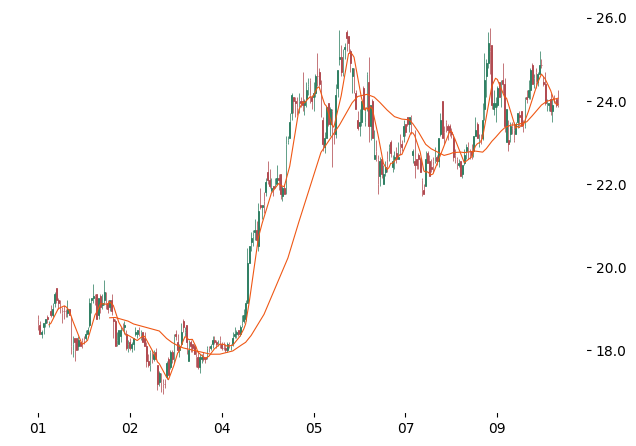

In [49]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Vẽ biểu đồ nến với các tùy chỉnh
fig, ax = mpf.plot(
    MBB_data, type="candle", style="charles", mav=(7, 40), ylabel="", returnfig=True
)

# Tùy chỉnh lưới và trục
ax[0].grid(False)  # Ẩn lưới


def format_y(value, tick_number):
    return f"{value / 1000}"


ax[0].yaxis.set_major_formatter(plt.FuncFormatter(format_y))

ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m"))

# Đặt nhãn trục x nằm ngang
for label in ax[0].get_xticklabels():
    label.set_rotation(0)

# Hiển thị biểu đồ
plt.show()

* **Xu hướng tăng:** Biểu đồ cho thấy xu hướng giá chung là tăng, thể hiện qua đường trung bình động đang đi lên.
* **Biến động ngắn hạn:** Giá cổ phiếu có những biến động lên xuống khá mạnh trong ngắn hạn, tạo thành các đỉnh và đáy liên tiếp.
* **Kháng cự và hỗ trợ:** Có thể nhận thấy các mức kháng cự và hỗ trợ rõ ràng, nơi giá thường dừng lại hoặc đảo chiều.
* **Khối lượng giao dịch:** Nếu có thêm thông tin về khối lượng giao dịch, chúng ta có thể đánh giá được sức mạnh của xu hướng và xác định các điểm mua bán tốt hơn.
* **Các chỉ báo kỹ thuật:** Việc sử dụng các chỉ báo kỹ thuật như RSI, MACD sẽ giúp xác định các tín hiệu mua bán chính xác hơn.

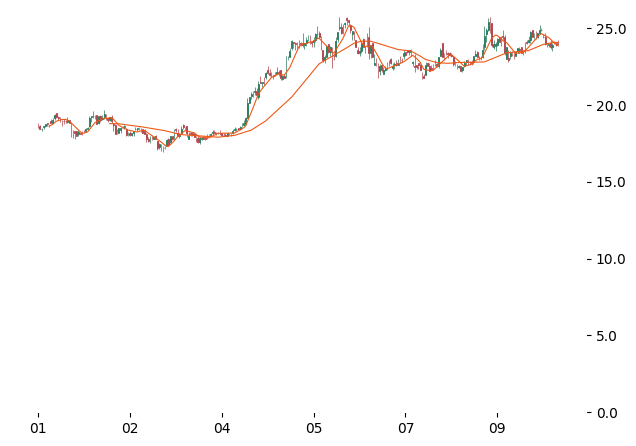

In [33]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Vẽ biểu đồ nến với các tùy chỉnh
fig, ax = mpf.plot(
    MBB_data, type="candle", style="charles", mav=(7, 40), ylabel="", returnfig=True
)

# Tùy chỉnh lưới và trục
ax[0].grid(False)  # Ẩn lưới


# Điều chỉnh hiển thị nhãn trục y chỉ với 2 chữ số đầu tiên (giới hạn số thập phân)
def format_y(value, tick_number):
    return f"{value / 1000}"


ax[0].yaxis.set_major_formatter(plt.FuncFormatter(format_y))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%m"))
# Đặt giới hạn trục y để bắt đầu từ 0
ax[0].set_ylim(bottom=0)

# Đặt nhãn trục x nằm ngang
for label in ax[0].get_xticklabels():
    label.set_rotation(0)

# Hiển thị biểu đồ
plt.show()

Khi đưa biểu đồ với trục tung bắt đầu từ 0 ta dễ nhận thấy giá cổ phiếu biến động cũng khá ít. Giảm bớt những hiểu lầm về mặt scale. Đồng thời là minh chứng quan trọng cho thấy sự ổn định của cổ phiếu trong danh mục đầu tư, ít rủi ro mà vẫn có tiềm năng tăng trưởng.

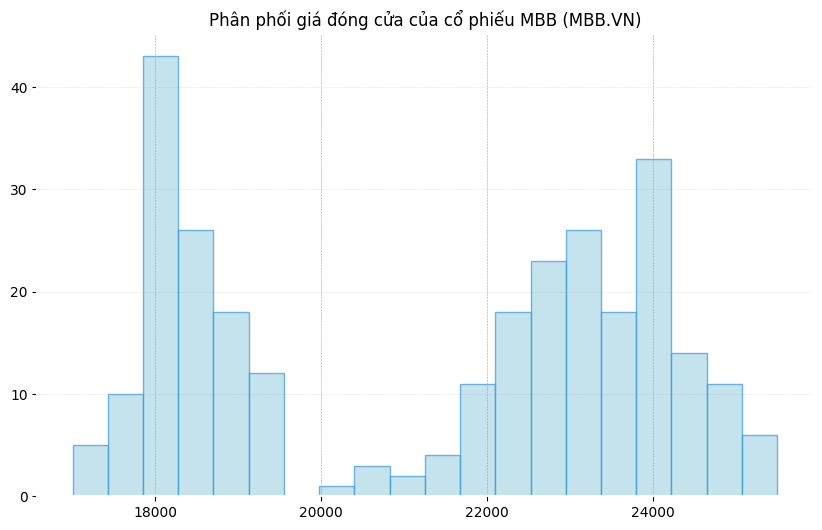

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

mbb_data = vn30["Close"]["MBB.VN"]

# Set a visually appealing figure size
plt.figure(figsize=(10, 6))  # Adjust width and height as needed

# Create a histogram with customized styling
plt.hist(
    mbb_data,
    bins=20,
    color="#ADD8E6",  # Light blue with slight transparency
    edgecolor="#3498DB",  # Darker blue for edges
    linewidth=1,  # Adjust line width for clarity
    alpha=0.7,  # Set transparency for a lighter feel
)

# Add a descriptive title with clear font size and style
plt.title("Phân phối giá đóng cửa của cổ phiếu MBB (MBB.VN)")

# Customize x-axis and y-axis labels
plt.xlabel("")
plt.ylabel("")

# Remove top and right spines for a cleaner look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Add a subtle grid on the y-axis for better readability
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Format y-axis tick labels for clarity (consider using a custom formatter if needed)
plt.ticklabel_format(style="plain", axis="y")

# Display the histogram
plt.show()

**Phân tích biểu đồ phân phối giá cổ phiếu MBB.VN**

**Biểu đồ histogram** này cho thấy sự phân bố tần suất của các mức giá đóng cửa của cổ phiếu MBB trong một khoảng thời gian nhất định. Dựa vào biểu đồ, chúng ta có thể rút ra một số nhận xét sau:

* **Phân bố không đồng đều:** Giá cổ phiếu MBB không phân bố đều quanh một giá trị trung bình mà tập trung chủ yếu ở một số mức giá nhất định. Điều này cho thấy có những mức giá mà cổ phiếu thường xuyên đóng cửa, có thể là do các mức hỗ trợ, kháng cự hoặc các sự kiện thị trường tác động.
* **Các đỉnh phân bố:** Biểu đồ cho thấy có một vài đỉnh phân bố rõ rệt, tức là có một số mức giá mà có rất nhiều phiên giao dịch đóng cửa tại đó. Điều này cho thấy các mức giá này có ý nghĩa quan trọng đối với cổ phiếu MBB.
* **Khoảng giá biến động:** Khoảng giá biến động của cổ phiếu MBB trong giai đoạn được phân tích là khá hẹp, cho thấy cổ phiếu có tính ổn định nhất định. Tuy nhiên, cần lưu ý rằng đây chỉ là một khoảng thời gian cụ thể và sự biến động có thể thay đổi trong các giai đoạn khác.

**Ý nghĩa của biểu đồ:**

* **Hiểu rõ hành vi giá:** Biểu đồ giúp nhà đầu tư hiểu rõ hơn về hành vi giá của cổ phiếu MBB, từ đó đưa ra các quyết định giao dịch phù hợp.
* **Xác định các mức hỗ trợ và kháng cự:** Các đỉnh phân bố trong biểu đồ có thể coi là các mức hỗ trợ và kháng cự tiềm năng. Khi giá tiếp cận các mức này, nhà đầu tư có thể đưa ra quyết định mua vào hoặc bán ra.
* **Đánh giá tính biến động:** Biểu đồ cho thấy mức độ biến động của giá cổ phiếu trong khoảng thời gian phân tích.

**Để có một phân tích toàn diện hơn, cần kết hợp biểu đồ histogram với các công cụ và chỉ báo kỹ thuật khác như:**

* **Đường trung bình động:** Để xác định xu hướng giá.
* **RSI, MACD:** Để đánh giá động lượng và xác định các điểm mua bán.
* **Biểu đồ nến:** Để phân tích chi tiết hơn về hành động giá.

In [ ]:
jupyter nbconvert --to pdf --TemplateExporter.exclude_input=True PhamNgocHai_21002139_160924.ipynb